   type                                               text
0   ham  Hope you are having a good week. Just checking in
1   ham                            K..give back my thanks.
2   ham        Am also doing in cbe only. But have to pay.
3  spam  complimentary 4 STAR Ibiza Holiday or å£10,000...
4  spam  okmail: Dear Dave this is your final notice to...
5   ham  Aiya we discuss later lar... Pick u up at 4 is...
6   ham                             Are you this much buzy
7   ham                    Please ask mummy to call father
8  spam  Marvel Mobile Play the official Ultimate Spide...
9   ham     fyi I'm at usf now, swing by the room whenever
5559
449488
Hope you are having a good week Just checking in Kgive back my thanks Am also doing in cbe only But have to pay complimentary 4 STAR Ibiza Holiday or å£10000 cash needs your URGENT collection 09066364349 NOW from Landline not to lose out Box434SK38WP150PPM18 okmail Dear Dave this is your final notice to collect your 4 Tenerife Holiday or

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SIVA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SIVA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Hope', 'you', 'are', 'having', 'a']
['Hope', 'good', 'week', 'Just', 'checking', 'Kgive', 'back', 'thanks', 'Am', 'also', 'cbe', 'But', 'pay', 'complimentary', '4', 'STAR', 'Ibiza', 'Holiday', 'å£10000', 'cash', 'needs', 'URGENT', 'collection', '09066364349', 'NOW', 'Landline', 'lose', 'Box434SK38WP150PPM18', 'okmail', 'Dear', 'Dave', 'final', 'notice', 'collect', '4', 'Tenerife', 'Holiday', '5000', 'CASH', 'award']
['hope', 'good', 'week', 'just', 'checking', 'kgive', 'back', 'thanks', 'am', 'also', 'cbe', 'but', 'pay', 'complimentary', '4', 'star', 'ibiza', 'holiday', 'å£10000', 'cash', 'needs', 'urgent', 'collection', '09066364349', 'now']
['hope', 'good', 'week', 'just', 'check', 'kgive', 'back', 'thank', 'am', 'also']
['hope', 'good', 'week', 'just', 'check', 'kgive', 'back', 'thank', 'be', 'also', 'cbe', 'but', 'pay', 'complimentari', '4', 'star', 'ibiza', 'holiday', 'å£10000', 'cash', 'need', 'urgent', 'collect', '09066364349', 'now']
{'hope': 3617, 'good': 3287, 'week': 7573,

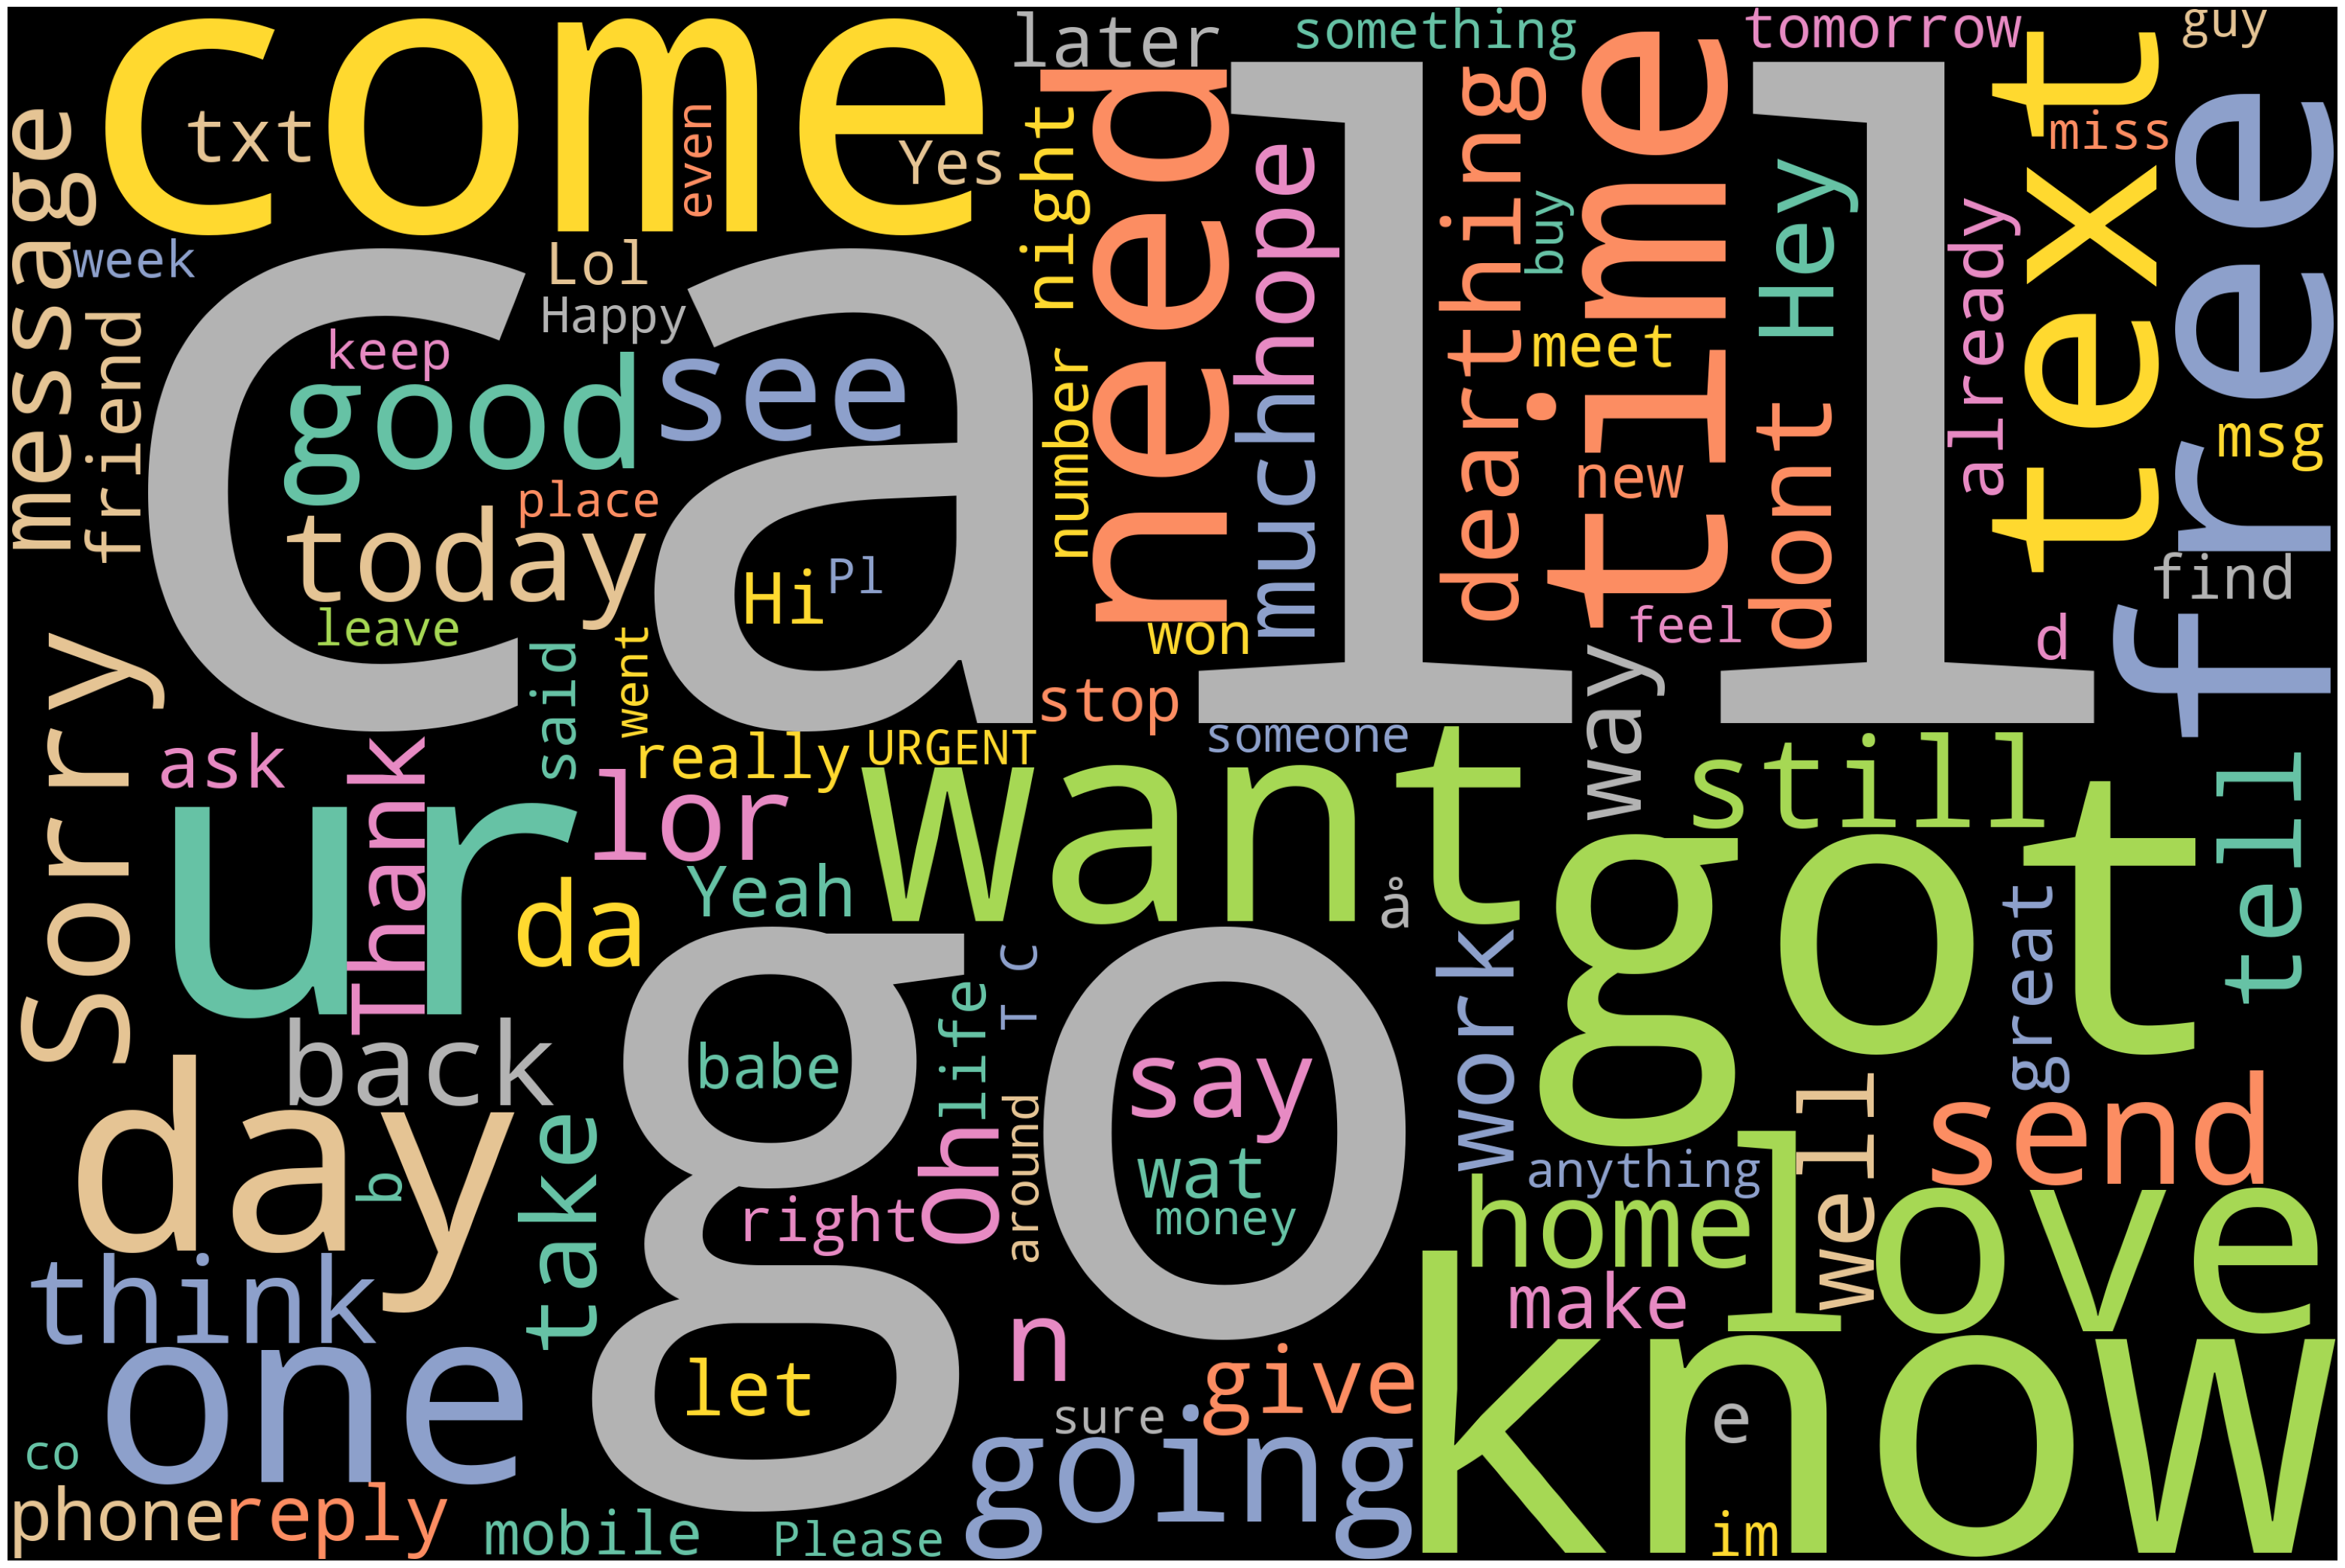

In [2]:
# Import necessary libraries for linear algebra, data preprocessing, and special string operations
import numpy as np
import pandas as pd
import string

# Import spacy for language models and NLTK for natural language processing tasks
import spacy
import nltk

# Import matplotlib for plotting and wordcloud for generating word clouds
from matplotlib import pyplot as plt
from wordcloud import WordCloud

# Ensure inline plotting with Jupyter notebooks
%matplotlib inline

# Read the CSV file containing the data
book = pd.read_csv("D://INTERNSHIP//CSV FILES//Hamspam.csv", encoding='latin1')

# Display the first 10 rows of the dataset
print(book.head(10))

# Strip whitespace from the 'text' column
book = [text.strip() for text in book.text]

# Remove any empty strings from the list
book = [i for i in book if i]

# Print the length of the processed text list
print(len(book))

# Join the list into one string/text
text = ' '.join(book)
print(len(text))

# Remove punctuation from the text
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
print(no_punc_text)

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

# Tokenize the text into words
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[:5])

# Convert the text into a list of characters (optional, may not be necessary)
list(no_punc_text)

# Define custom stop words and remove them from the tokenized text
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
my_stop_words.append('Its')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:40])

# Normalize the data by converting all tokens to lowercase
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[:25])

# Perform stemming to reduce words to their root form
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[:10])

# Load the English language model from spacy
nlp = spacy.load('en_core_web_sm')

# Perform lemmatization using spacy
doc = nlp(' '.join(stemmed_tokens))
lemmas = [token.lemma_ for token in doc]
print(lemmas[:25])

# Feature extraction using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

# Display the vocabulary and the document-term matrix
print(vectorizer.vocabulary_)
pd.DataFrame(vectorizer.vocabulary_, columns=vectorizer.vocabulary_.keys(), index=[0]).T
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0, ascending=False).head()

# Display feature names and the document-term matrix
print(vectorizer.get_feature_names_out()[50:100])
print(X.toarray()[50:100])
print(X.toarray().shape)

# Feature extraction with n-grams using CountVectorizer
vec_ngram_range = CountVectorizer(analyzer='word', ngram_range=(3, 3), max_features=100)
bow_matrix_ngram = vec_ngram_range.fit_transform(book)
print(vec_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

# Feature extraction using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2", analyzer="word", ngram_range=(1, 3), max_features=10)
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(book)
print(tf_idf_matrix_n_gram_max_features.toarray())

# Define a function to plot the word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")
from wordcloud import WordCloud,STOPWORDS
# Generate a word cloud with custom stop words
stopwords = set(STOPWORDS)
stopwords.update(['will', 'ok', 'now', 'u'])
wordcloud = WordCloud(width=3000, height=2000, background_color="black", max_words=100, colormap="Set2", stopwords=stopwords).generate(text)

# Plot the word cloud
plot_cloud(wordcloud)

# Save the word cloud image to a file
wordcloud.to_file('wordcloud.png')
